In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [3]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from IPython.display import clear_output

In [84]:
import random

In [121]:
import re

In [45]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 



In [123]:
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_pt.txt"
lines= open( pgnfile)
lines10k= [next(lines) for x in range( 10000)]
lines= [re.sub("[\[].*?[\]]", "", ln) for ln in lines10k]
lines= [ln[8:-1].split()[0:100] for ln in lines]

In [124]:
lines10k[0]

'000001: [1] d4 f5 [2] Cf3 g6 [3] g3 Bg7 [4] Bg2 Cf6 [5] b4 c6 [6] c4 d5 [7] Db3 Be6 [8] c5 Ce4 [9] O-O Cd7 [10] Bf4 O-O [11] Cbd2 Bf7 [12] De3 De8 [13] Bh6 Cdf6 [14] Ce5 Cxd2 [15] Dxd2 Cd7 [16] Bxg7 Rxg7 [17] Df4 Be6 [18] a4 Cxe5 [19] Dxe5+ Tf6 [20] f4 Rg8 [21] Tfb1 Bc8 [22] Dc7 Dd7 [23] Dxd7 Bxd7 [24] b5 Tff8 [25] e3 e6 [26] Bf1 Rf7 [27] a5 Tfb8 [28] Tb2 Re7 [29] Tab1 Tc8 [30] bxc6 bxc6 [31] Ba6 Tc7 [32] Tb8 Txb8 [33] Txb8 Be8 [34] Bb7 Bd7 [35] a6 Be8 [36] Ta8 Bd7 [37] Rf2 Rf6 [38] Th8 Rg7 [39] Ta8 Rf6 [40] Re2 h6 [41] Rd2 g5 [42] Rc3 gxf4 [43] exf4\n'

In [144]:
lines[0]

['d4',
 'f5',
 'Cf3',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'Cf6',
 'b4',
 'c6',
 'c4',
 'd5',
 'Db3',
 'Be6',
 'c5',
 'Ce4',
 'O-O',
 'Cd7',
 'Bf4',
 'O-O',
 'Cbd2',
 'Bf7',
 'De3',
 'De8',
 'Bh6',
 'Cdf6',
 'Ce5',
 'Cxd2',
 'Dxd2',
 'Cd7',
 'Bxg7',
 'Rxg7',
 'Df4',
 'Be6',
 'a4',
 'Cxe5',
 'Dxe5+',
 'Tf6',
 'f4',
 'Rg8',
 'Tfb1',
 'Bc8',
 'Dc7',
 'Dd7',
 'Dxd7',
 'Bxd7',
 'b5',
 'Tff8',
 'e3',
 'e6',
 'Bf1',
 'Rf7',
 'a5',
 'Tfb8',
 'Tb2',
 'Re7',
 'Tab1',
 'Tc8',
 'bxc6',
 'bxc6',
 'Ba6',
 'Tc7',
 'Tb8',
 'Txb8',
 'Txb8',
 'Be8',
 'Bb7',
 'Bd7',
 'a6',
 'Be8',
 'Ta8',
 'Bd7',
 'Rf2',
 'Rf6',
 'Th8',
 'Rg7',
 'Ta8',
 'Rf6',
 'Re2',
 'h6',
 'Rd2',
 'g5',
 'Rc3',
 'gxf4',
 'exf4']

In [68]:
lines10k[0]

'000001: d4 f5 Nf3 g6 g3 Bg7 Bg2 Nf6 b4 c6 c4 d5 Qb3 Be6 c5 Ne4 O-O Nd7 Bf4 O-O Nbd2 Bf7 Qe3 Qe8 Bh6 Ndf6 Ne5 Nxd2 Qxd2 Nd7 Bxg7 Kxg7 Qf4 Be6 a4 Nxe5 Qxe5+ Rf6 f4 Kg8 Rfb1 Bc8 Qc7 Qd7 Qxd7 Bxd7 b5 Rff8 e3 e6 Bf1 Kf7 a5 Rfb8 Rb2 Ke7 Rab1 Rc8 bxc6 bxc6 Ba6 Rc7 Rb8 Rxb8 Rxb8 Be8 Bb7 Bd7 a6 Be8 Ra8 Bd7 Kf2 Kf6 Rh8 Kg7 Ra8 Kf6 Ke2 h6 Kd2 g5 Kc3 gxf4 exf4\n'

In [122]:
re.sub("[\[].*?[\]]", "", lines10k[0])

'000001:  d4 f5  Cf3 g6  g3 Bg7  Bg2 Cf6  b4 c6  c4 d5  Db3 Be6  c5 Ce4  O-O Cd7  Bf4 O-O  Cbd2 Bf7  De3 De8  Bh6 Cdf6  Ce5 Cxd2  Dxd2 Cd7  Bxg7 Rxg7  Df4 Be6  a4 Cxe5  Dxe5+ Tf6  f4 Rg8  Tfb1 Bc8  Dc7 Dd7  Dxd7 Bxd7  b5 Tff8  e3 e6  Bf1 Rf7  a5 Tfb8  Tb2 Re7  Tab1 Tc8  bxc6 bxc6  Ba6 Tc7  Tb8 Txb8  Txb8 Be8  Bb7 Bd7  a6 Be8  Ta8 Bd7  Rf2 Rf6  Th8 Rg7  Ta8 Rf6  Re2 h6  Rd2 g5  Rc3 gxf4  exf4\n'

In [74]:
len( lines)

10000

In [75]:
lines[0]

['d4',
 'f5',
 'Nf3',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'Nf6',
 'b4',
 'c6',
 'c4',
 'd5',
 'Qb3',
 'Be6',
 'c5',
 'Ne4',
 'O-O',
 'Nd7',
 'Bf4',
 'O-O',
 'Nbd2',
 'Bf7',
 'Qe3',
 'Qe8',
 'Bh6',
 'Ndf6',
 'Ne5',
 'Nxd2',
 'Qxd2',
 'Nd7',
 'Bxg7',
 'Kxg7',
 'Qf4',
 'Be6',
 'a4',
 'Nxe5',
 'Qxe5+',
 'Rf6',
 'f4',
 'Kg8',
 'Rfb1',
 'Bc8',
 'Qc7',
 'Qd7',
 'Qxd7',
 'Bxd7',
 'b5',
 'Rff8',
 'e3',
 'e6',
 'Bf1',
 'Kf7',
 'a5',
 'Rfb8',
 'Rb2',
 'Ke7',
 'Rab1',
 'Rc8',
 'bxc6',
 'bxc6',
 'Ba6',
 'Rc7',
 'Rb8',
 'Rxb8',
 'Rxb8',
 'Be8',
 'Bb7',
 'Bd7',
 'a6',
 'Be8',
 'Ra8',
 'Bd7',
 'Kf2',
 'Kf6',
 'Rh8',
 'Kg7',
 'Ra8',
 'Kf6',
 'Ke2',
 'h6',
 'Kd2',
 'g5',
 'Kc3',
 'gxf4',
 'exf4']

In [131]:
en_pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
en_lines= open( en_pgnfile)
en_lines10k= [next(en_lines) for x in range( 10000)]
en_lines= [ln[8:-1].split()[0:100] for ln in en_lines10k]

In [147]:
#
# gera imagem com jogadas escritas com fonte manuscrito
#
from PIL import Image, ImageDraw
from PIL import ImageColor

In [149]:
# abre o arquivo original
img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
dctx = ImageDraw.Draw(img)  # create drawing context

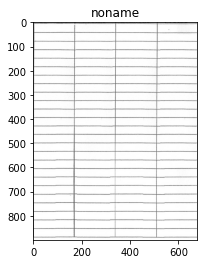

In [150]:
show( img)

In [10]:
# -*- coding: utf-8 -*-
from PIL import ImageFont


In [11]:
fnt = ImageFont.truetype('c:/Windows/Fonts/msmincho.ttc', 30)

In [12]:
# text to draw
txt = u"東京タワーと三縁山増上寺"  # Tokyo tower and San'en-zan Zōjō-ji

# calculate text size
txtsz = dctx.textsize(txt, fnt)

In [17]:
# draw text

dctx.text(
    # draw text at near (right, top)
#    (img.width - txtsz[0] - 20, 20),
    (0, 0),
    txt,
    font=fnt,
    fill="#000000"
    )

In [34]:
# del dctx  # destroy drawing context
del dctx

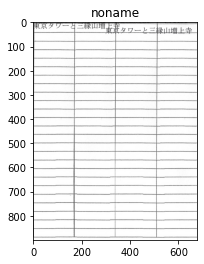

In [18]:
show( img)

In [21]:
h= 0

In [46]:
fnt = ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 30)
dctx.text( (0, h), "Cxf5", font=fnt, fill="#000000")
h+= 30


NameError: name 'dctx' is not defined

In [30]:
img.save("C:/mestrado/datasets/handmade/generated/samples/sample.jpg")

In [61]:
dh_top= 7
dh_bottom= 13
h= (img.height - dh_top - dh_bottom)/25.0
w= img.width/4.0
print( h, w)

35.2 169.5


In [59]:
margin_left= w/4
margin_top= h/6
print( margin_top, margin_left)

5.866666666666667 42.375


In [113]:
all_fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/CHILLER.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/FORTE.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/FREESCPT.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/GIGI.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/Gabriola.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/LCALLIG.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/RAGE.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/sserife.fon', 30),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 30),

    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
    
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 30)
] 



In [140]:
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/CHILLER.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/FORTE.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/FREESCPT.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/GIGI.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/Gabriola.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/LCALLIG.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/RAGE.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 30)
] 


In [198]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def generate_for( line, fnt=None):
    if fnt is None:
        fnt= random.choice( fonts)
#     print( fnt.getname())
    
    img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    i= 0
    for ln in range( 0, 25):
        for col in range( 0, 2):
            if i>= len( line):
                del dctx
                return img
            
            txtsz = dctx.textsize(line[i], fnt)

            x= w* col + (w - txtsz[0])/2
            y= dh_top + h*ln + (h - txtsz[1])/2 #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i+= 1

    for ln in range( 0, 25):
        for col in range( 2, 4):
            if i>= len( line):
                del dctx
                return img
            
            txtsz = dctx.textsize(line[i], fnt)

            x= w* col + (w - txtsz[0])/2
            y= dh_top + h*ln #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i+= 1
            
    del dctx
    return img


def generate_one( pt_line, pgn, no):
    img= generate_for( pt_line)

    fname= "syn_"+str(no).zfill(5)
    img.save( 
        os.path.join( 
            "C:/mestrado/datasets/unified/parts/sync-except-handwritten",
            "images", fname+ ".jpg"))

    write_label( 
        os.path.join( 
            "C:/mestrado/datasets/unified/parts/sync-except-handwritten",
            "labels", fname+ ".pgn"), pgn)        

    
    
#----------------------
# generate
#----------------------
# for i in range( 0, 10000):
#     if i%100== 0:
#         print( i)
#     generate_one( lines[i], " ".join( en_lines[i]), i)             

#----------------------
# show image
#----------------------
# i= 0
# for f in fonts:
#     print( i, f.getname())
#     img= generate_for( lines[2], f)
#     showbig( img)
#     i+= 1

In [152]:
import glob

In [190]:
#
#  gerar somente os que nao tem no handwritten
#

# carrega os jogos existentes
handfiles= glob.glob( "C:/mestrado/datasets/unified/parts/handwritten/labels/*.pgn")

In [156]:
print( len( handfiles))

3422


In [157]:
fname= handfiles[0]


In [183]:
Path(fname).name.split('_')

['a3',
 '',
 'd5',
 '',
 'd4',
 '',
 'Nf6',
 '5742',
 '1494',
 'R',
 'part3',
 'scan0145.pgn']

In [169]:
# a3__d5__d4__Nf6_5742_1494_R_part3_scan0145
id= int( Path(fname).name.split('_')[-5])-1
print( id)

5741


In [166]:
print( read_label( fname))

a3 d5 d4 Nf6 Nf3 Bg4 e3 e6 Be2 Bd6 c4 c6 Nbd2 Nbd7 b4 O-O Bb2 Ne4 Ne5 Bxe2 Qxe2 Nxd2 Qxd2 Bxe5 dxe5 dxc4 Rd1 Nb6 Qe2 Qc7 Qg4 c5 O-O cxb4 axb4 c3 Rc1 Na4 Rxc3 Nxc3 Rc1 Rfd8 Bxc3 Rac8 h3 Qc4 e4 Qd3 Qh4 Rd7


In [171]:
" ".join( en_lines[ id])

'a3 d5 d4 Nf6 Nf3 Bg4 e3 e6 Be2 Bd6 c4 c6 Nbd2 Nbd7 b4 O-O Bb2 Ne4 Ne5 Bxe2 Qxe2 Nxd2 Qxd2 Bxe5 dxe5 dxc4 Rd1 Nb6 Qe2 Qc7 Qg4 c5 O-O cxb4 axb4 c3 Rc1 Na4 Rxc3 Nxc3 Rc1 Rfd8 Bxc3 Rac8 h3 Qc4 e4 Qd3 Qh4 Rd7'

In [185]:
for f in handfiles:
    if 'scan' not in Path(f).name:
        print( Path(f).name)


In [192]:
s= set()
for f in handfiles:
    s.add( int( Path(f).name.split('_')[-5][-4:])-1)

In [202]:
print( len( s))

2742


In [199]:
len( en_lines[i])

56

In [204]:
for i in range( 100, 10000): 
    if i%100== 0:
        print( i)
    if len( en_lines[i])< 50:
        continue
    if i in s:
        pass
#         print( "pass "+ str(i+1))
    else:
#         print( 'generating for '+ str(i+1))
        generate_one( lines[i], " ".join( en_lines[i]), i+1)             


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
